In [9]:
import math
import random
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [10]:
def generate_data():
    digits = np.loadtxt('digits_data.csv', delimiter = ',')
    y = digits[:,0:10]
    digits = digits[:50,10:] 
    digits -= digits.min() 
    digits /= digits.max() 
    images = digits

    out = []
    for i in range(images.shape[0]):
        split = list((images[i,:].tolist(), y[i].tolist())) 
        out.append(split)
    return out

In [11]:
input_nn = 65
hidden_nn = 80
output_nn = 10

iin = np.ones(input_nn)
zin = np.ones(hidden_nn)
yin = np.ones(output_nn)

input_range = 1.0 / input_nn ** (1/2)
output_range = 1.0 / hidden_nn ** (1/2)
w1 = np.random.normal(loc = 0, scale = input_range, size = (input_nn, hidden_nn))
w2 = np.random.normal(loc = 0, scale = output_range, size = (hidden_nn, output_nn))
        
c1 = np.zeros((input_nn, hidden_nn))
c2 = np.zeros((hidden_nn, output_nn))

X = generate_data()

In [12]:
 def Validation(images):
    c = 0
    for p in images:
        inputs = p[0]
        for k in range(input_nn - 1):
            iin[k] = inputs[k] 

        for j in range(hidden_nn):
            sum = 0.0
            for k in range(input_nn):
                sum += iin[k] * w1[k][j]
            zin[j] = 1 / (1 + np.exp(-sum))

        for k in range(output_nn):
            sum = 0.0
            for j in range(hidden_nn):
                sum += zin[j] * w2[j][k]
            yin[k] = 1 / (1 + np.exp(-sum))

        m = max(yin)
        n = max(p[1])

        ind1 = list(yin).index(m)
        ind2 = p[1].index(n)
        if ind1==ind2:
            c= c + 1

    print("Images classified: %d"%c)
    return c

In [13]:
def train( images,iterations,learning_rate):
    for i in range(iterations):
        error = 0.0
        for p in images:
            inputs = p[0]
            targets = p[1]
            
            #forward propagation
            for k in range(input_nn - 1):
                iin[k] = inputs[k] 

            for j in range(hidden_nn):
                sum = 0.0
                for k in range(input_nn):
                    sum += iin[k] * w1[k][j]
                zin[j] = 1 / (1 + np.exp(-sum))

            for k in range(output_nn):
                sum = 0.0
                for j in range(hidden_nn):
                    sum += zin[j] * w2[j][k]
                yin[k] = 1 / (1 + np.exp(-sum))
            
            
            #back propagation 
            output_deltas = np.zeros(output_nn)
            for k in range(output_nn):
                local_error = -(targets[k] - yin[k])
                output_deltas[k] = (yin[k])*(1-yin[k]) * local_error

            hidden_deltas = np.zeros(hidden_nn)
            for j in range(hidden_nn):
                local_error = 0.0
                for k in range(output_nn):
                    local_error += output_deltas[k] * w2[j][k]
                hidden_deltas[j] = (1-zin[j])* zin[j]* local_error

            #update weight
            for j in range(hidden_nn):
                for k in range(output_nn):
                    change = output_deltas[k] *zin[j]
                    a1 = c2[j][k]
                    w2[j][k] -= learning_rate * change + a1 
                    c2[j][k] = change

            
            for i in range(input_nn):
                for j in range(hidden_nn):
                    change = hidden_deltas[j] * iin[i]
                    w1[i][j] -= learning_rate * change + c1[i][j] 
                    c1[i][j] = change

            for k in range(len(targets)):
                error += 0.5 * (targets[k] - yin[k]) ** 2
            

        print("total error : %f " % error)

In [14]:
def prediction(X):
       
    pred = []
    for p in X:
        inputs = p
        for k in range(input_nn - 1):
            iin[k] = inputs[k] 

        for j in range(hidden_nn):
            sum = 0.0
            for k in range(input_nn):
                sum += iin[k] * w1[k][j]
            zin[j] = 1 / (1 + np.exp(-sum))

        for k in range(output_nn):
            sum = 0.0
            for j in range(hidden_nn):
                sum += zin[j] * w2[j][k]
            yin[k] = 1 / (1 + np.exp(-sum))

        pred.append(yin)
    return pred

In [15]:

def build_model():
    iteration = [] 
    accuracy = []
    alpha = 0.3
    epoch = 10
    
    for i in range(0,epoch):
        iteration.append(i)
        train(X,1,0.3)
        out1 = Validation(X)
        accuracy.append(out1)
    plt.plot(iteration,accuracy)
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy")
    plt.title("Neural network performance")
    plt.show()


total error : 26.816984 
Images classified: 7
total error : 24.498409 
Images classified: 7
total error : 23.735193 
Images classified: 12
total error : 22.855842 
Images classified: 12
total error : 20.713075 
Images classified: 17
total error : 18.074135 
Images classified: 23
total error : 15.717091 
Images classified: 31
total error : 13.187395 
Images classified: 35
total error : 10.787134 
Images classified: 43
total error : 8.757682 
Images classified: 45


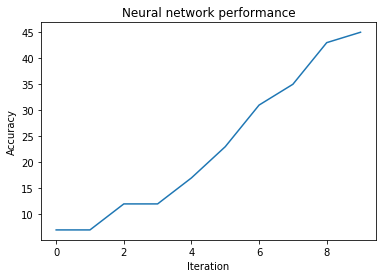

In [16]:
build_model()